<a href="https://colab.research.google.com/github/spohle-a11y/MPM_200_Pohle/blob/src%2Fmodels%2FMPM200_Session5_HW_SPohle.ipynb/MPM200_Session5_HW_SPohle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

In [22]:
# Install R packages
install.packages('beepr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘audio’




In [23]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [26]:
install.packages('sjPlot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [27]:
library(beepr)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(sjPlot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ readr     2.1.6
✔ ggplot2   4.0.1     ✔ stringr   1.6.0
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.2.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
✖ ggplot2::set_theme() masks sjPlot::set_theme()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [28]:
h_bird = read.csv ('/content/Hummingbird_data.csv')

In [29]:
ls()

[1] "backward_model"   "forward_model"    "fullmodel"        "h_bird"          
[5] "model_data"       "null_model"       "simplified_model"

In [30]:
head(h_bird)

,Admitted,Disposition_binary,Place,F_Aid,Species_e,Sex_e,Age_e,Brought_in_after,season,r,Green_Orange,ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,1/2/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,1,Winter,found on the ground,Non-selasphorus spp.,1_ANHU
2,1/2/1991,Released,Lindsey,Yes,ANHU,Female-like,adult-like,0,Winter,unknown,Non-selasphorus spp.,2_ANHU
3,1/4/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,suspect torpor-like state,Non-selasphorus spp.,3_ANHU
4,1/5/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,4,Winter,unknown,Non-selasphorus spp.,4_ANHU
5,1/5/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,caught by domestic animal,Non-selasphorus spp.,5_ANHU
6,1/5/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,found on the ground,Non-selasphorus spp.,6_ANHU


In [31]:
nrow(h_bird)
ncol(h_bird)

[1] 6908

[1] 12

In [32]:
colnames(h_bird)


[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

**Q2. How many rows and columns are in the datafame**  
1 point

In [33]:
nrow(h_bird)
ncol(h_bird)
## 6908 rows and 12 columns

[1] 6908

[1] 12

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [34]:
str(h_bird)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [35]:
# Identify data types of each column
data_types = sapply(h_bird, class)
print(data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [36]:
library(dplyr)
model_data = sample_n(h_bird, 5000)

In [37]:
nrow(model_data)
ncol(model_data)

[1] 5000

[1] 12

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

5000 rows
12 columns


**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

11 categorical variables and one continuous variable taken from " str(h_bird)"


**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [38]:
write.csv(model_data, "/content/model_data.csv")

In [39]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [40]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4138
Santa Barbara,74
malibu,788


In [41]:
rehab = model_data  %>% #creating a pipe function named rehab from model_data
group_by(Place)%>% #grouping the bins
summarise(count = n_distinct(ID))

In [42]:
p = ggplot(rehab, aes(x = Place, y = count)) + #aes is aethetics code
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+ #creating a bar chart, setting color of bars
xlab('Rehabilitation Center')+ ylab('Number of hummingbirds')+ #labeling x and y axis
labs(title = "Number of Rescued Hummingbirds") #labeling the title
ggsave("/content/h_bird_bar_chart.pdf", width = 4, height = 4) #save plot

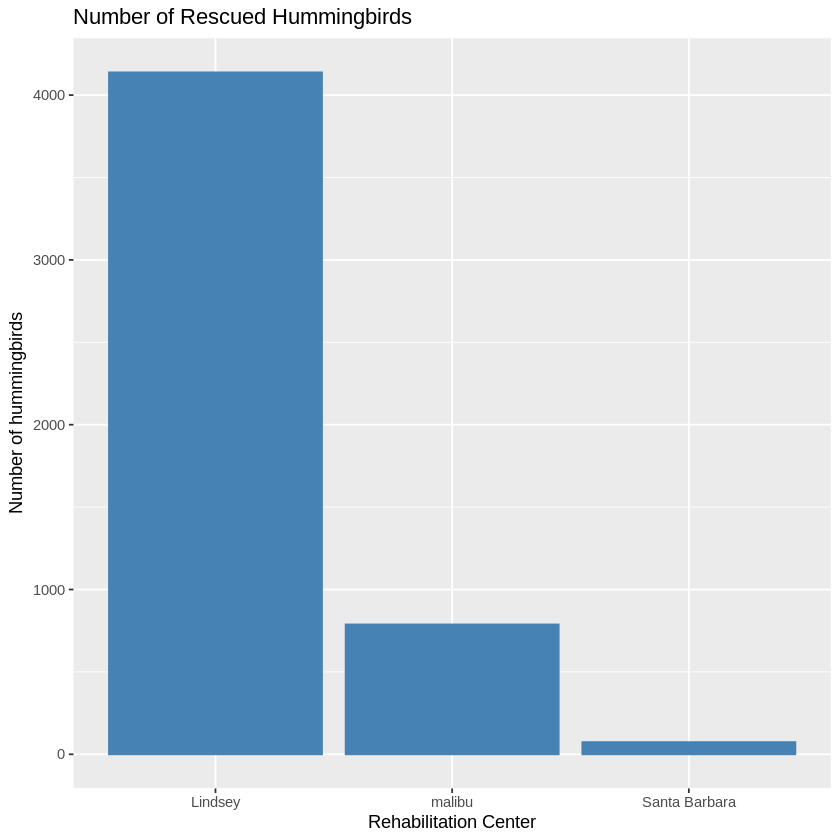

In [43]:
p

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

Explained in the code steps above

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

##5 covariates:
1) F_Aid
2) Place
3) Brought_in_after
4) r (reason for admission)
5) season


In [44]:
model_data%>%
group_by(Disposition_binary, ID)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Disposition_binary'. You can override
using the `.groups` argument.


Disposition_binary,ID,count
<chr>,<chr>,<int>
Died,1001_RUHU,1
Died,1002_ANHU,1
Died,1003_ANHU,1
Died,1004_ANHU,1
Died,1007_ANHU,1
Died,1009_ANHU,1
Died,1011_ALHU,1
Died,1015_ANHU,1
Died,101_ALHU,1


`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


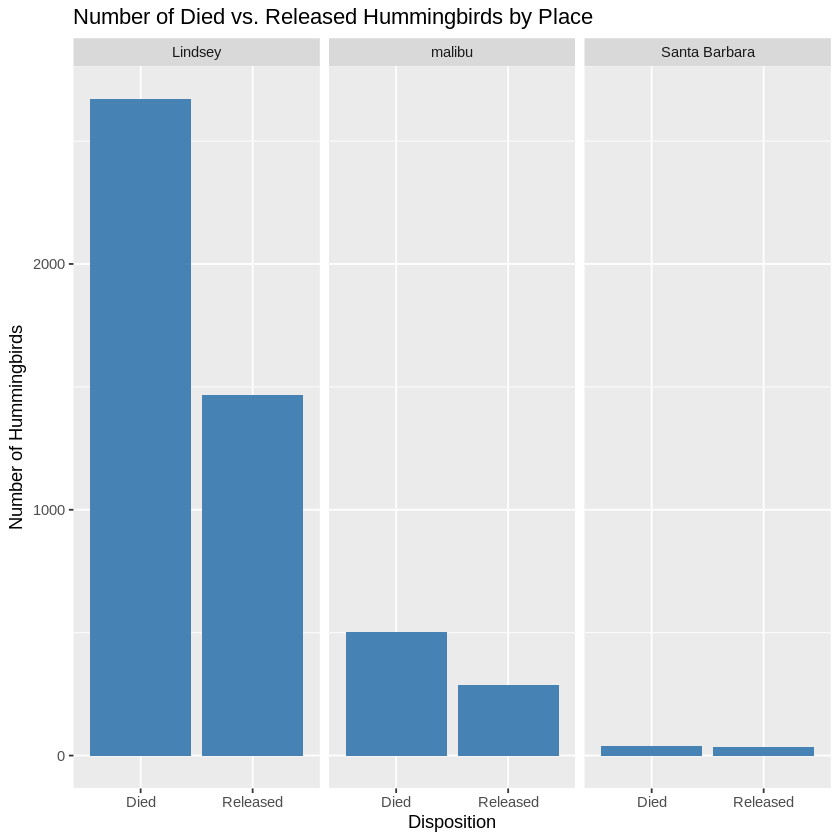

In [45]:
library(dplyr)
library(ggplot2)

# Calculate counts for Place and Disposition_binary
place_disposition_counts = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

# Plot the counts for Disposition_binary, faceted by Place
ggplot(place_disposition_counts, aes(x = Disposition_binary, y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  xlab("Disposition") +
  ylab("Number of Hummingbirds") +
  labs(title = "Number of Died vs. Released Hummingbirds by Place") +
  facet_grid(. ~ Place) # Facet by Place in columns

In [46]:
model_data%>%
group_by(F_Aid,Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'F_Aid'. You can override using the
`.groups` argument.


F_Aid,Disposition_binary,count
<chr>,<chr>,<int>
No,Died,2128
No,Released,1174
Yes,Died,1086
Yes,Released,612


`summarise()` has grouped output by 'F_Aid'. You can override using the
`.groups` argument.


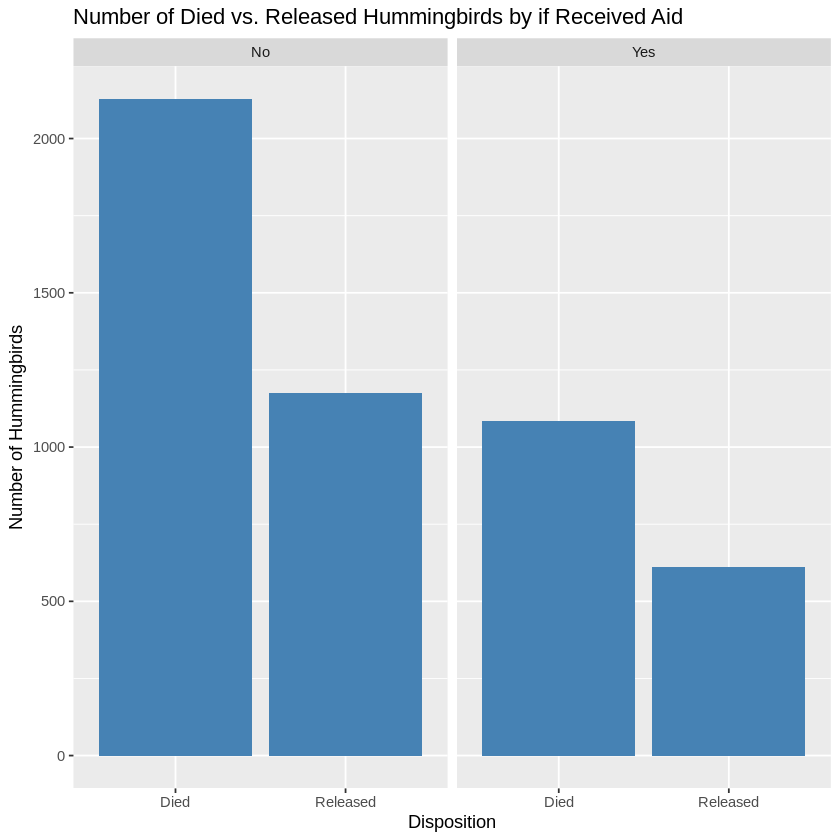

In [47]:
library(dplyr)
library(ggplot2)

# Calculate counts for F_Aid and Disposition_binary
F_Aid_disposition_counts = model_data %>%
  group_by(F_Aid, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

# Plot the counts for DB, faceted by aid
ggplot(F_Aid_disposition_counts, aes(x = Disposition_binary, y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  xlab("Disposition") +
  ylab("Number of Hummingbirds") +
  labs(title = "Number of Died vs. Released Hummingbirds by if Received Aid") +
  facet_grid(. ~ F_Aid) # Facet by whether aid was given in columns

In [48]:
model_data%>%
group_by(r, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'r'. You can override using the `.groups`
argument.


r,Disposition_binary,count
<chr>,<chr>,<int>
caught by domestic animal,Died,467
caught by domestic animal,Released,166
found inside,Died,116
found inside,Released,47
found on the ground,Died,1390
found on the ground,Released,745
nest-related,Died,277
nest-related,Released,410
suspect torpor-like state,Died,89


`summarise()` has grouped output by 'r'. You can override using the `.groups`
argument.


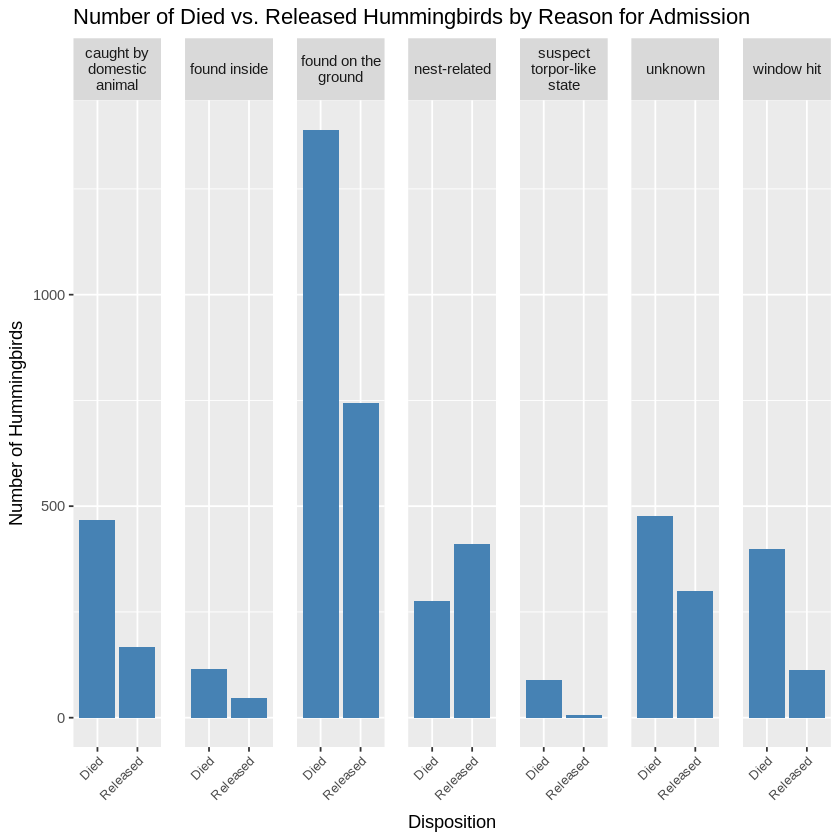

In [49]:
library(dplyr)
library(ggplot2)

# Calculate counts for r and Disposition_binary
r_disposition_counts = model_data %>%
  group_by(r, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

# Plot the counts
ggplot(r_disposition_counts, aes(x = Disposition_binary, y = count)) +
geom_bar(stat = "identity", fill = "steelblue") +
  xlab("Disposition") +
  ylab("Number of Hummingbirds") +
  labs(title = "Number of Died vs. Released Hummingbirds by Reason for Admission") +
  facet_grid(. ~ r, labeller = labeller(r = label_wrap_gen(width = 15))) + # Facet by r and wrap text to fit size

# Add adjustments for fitting text in axis
theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
        strip.text = element_text(size = 9),
        panel.spacing = unit(0.5, "cm"))

In [50]:
model_data%>%
group_by(Disposition_binary, season)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Disposition_binary'. You can override
using the `.groups` argument.


Disposition_binary,season,count
<chr>,<chr>,<int>
Died,Fall,394
Died,Spring,1314
Died,Summer,934
Died,Winter,572
Released,Fall,60
Released,Spring,938
Released,Summer,592
Released,Winter,196


`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


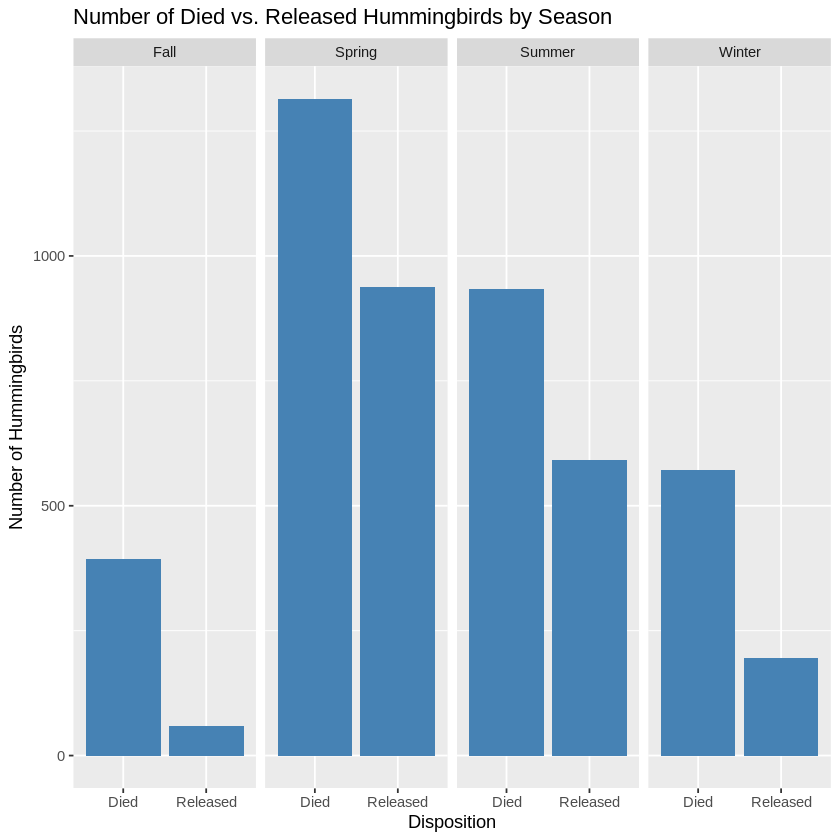

In [51]:
library(dplyr)
library(ggplot2)

# Calculate counts for season and Disposition_binary
season_disposition_counts = model_data %>%
  group_by(season, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

# Plot the counts for DB faceted by season
ggplot(season_disposition_counts, aes(x = Disposition_binary, y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  xlab("Disposition") +
  ylab("Number of Hummingbirds") +
  labs(title = "Number of Died vs. Released Hummingbirds by Season") +
  facet_grid(. ~ season) # Facet by season

In [52]:
model_data%>%
group_by(Brought_in_after, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Brought_in_after'. You can override using
the `.groups` argument.


Brought_in_after,Disposition_binary,count
<int>,<chr>,<int>
-365,Released,1
-182,Released,1
-159,Released,1
-81,Released,1
-79,Released,1
-70,Released,1
-68,Released,1
-47,Released,1
-44,Released,1


**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

##The tables are difficult to use as comparisons of risk. I would suggest to calcuate the relative risk of each category. A chi square test of independence for the categorical variables can be done, I can also make proportion tables. The continuous variable Brought_in_after will make things difficult.

##After performing a chi square test on the categorical variables, the two statistically significant variables are season and r. Therefore I will further explore those two by calculating proportion died by variable


##Calculate proportions by season

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


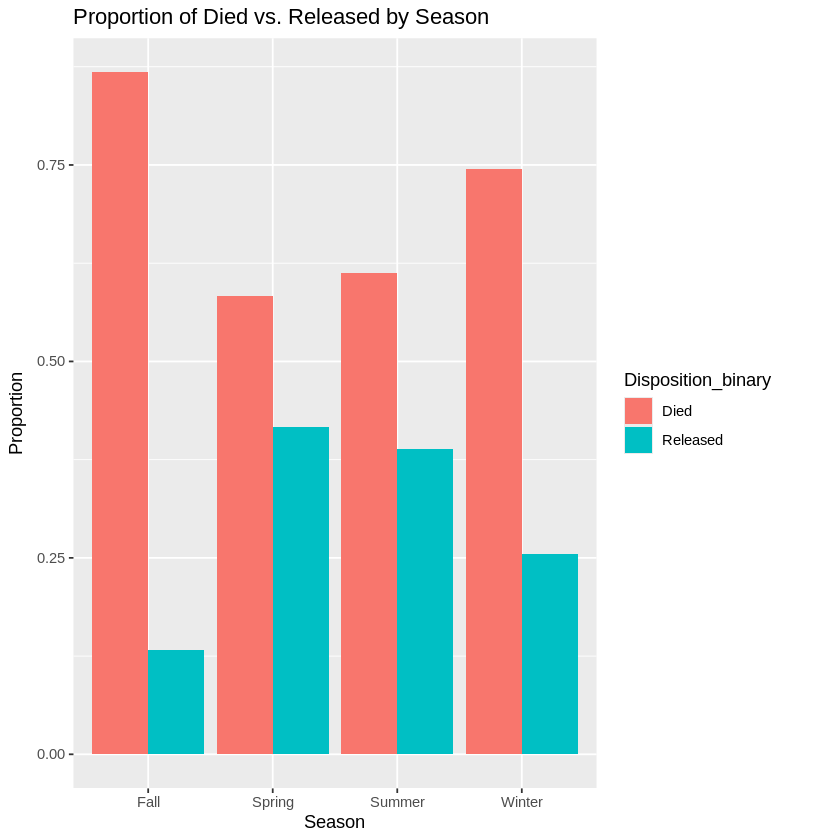

In [54]:
library(dplyr)
library(ggplot2)

# Calculate proportions for season
proportions_season = model_data %>%
  group_by(season, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(season) %>%
  mutate(proportion = count / sum(count))

# Plot the proportions for season
p_season = ggplot(proportions_season, aes(x = season, y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Season") +
  ylab("Proportion") +
  labs(title = "Proportion of Died vs. Released by Season")

# Print the plot
print(p_season)

# Save the plot
ggsave("/content/season_proportions_bar_chart.pdf", plot = p_season, width = 6, height = 4)

##calculate proportions for r to further explore

`summarise()` has grouped output by 'r'. You can override using the `.groups`
argument.


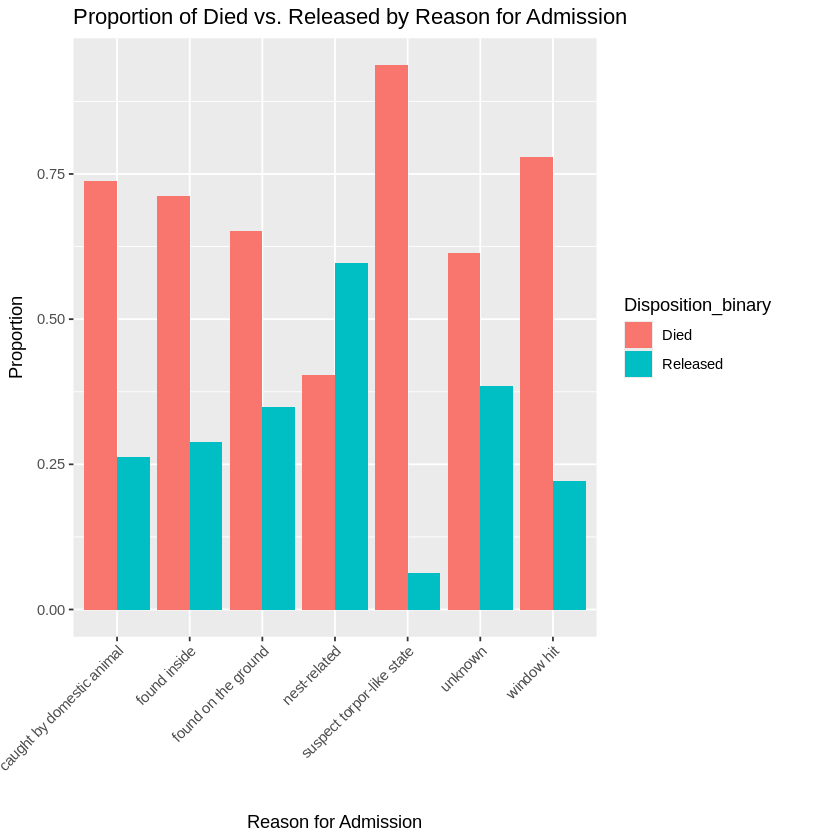

In [55]:
library(dplyr)
library(ggplot2)

# Calculate proportions for r
proportions_r = model_data %>%
  group_by(r, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(r) %>%
  mutate(proportion = count / sum(count))

# Plot the proportions for r
p_r = ggplot(proportions_r, aes(x = r, y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Reason for Admission") +
  ylab("Proportion") +
  labs(title = "Proportion of Died vs. Released by Reason for Admission") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

# Print the plot
print(p_r)

# Save the plot
ggsave("/content/r_proportions_bar_chart.pdf", plot = p_r, width = 8, height = 6)


##I will now try to explore the variable, Brought_in_after


In [56]:
# Convert Disposition_binary to a factor
model_data$Disposition_binary = as.factor(model_data$Disposition_binary)

# Perform logistic regression for Brought_in_after
logistic_model = glm(Disposition_binary ~ Brought_in_after, data = model_data, family = binomial)
summary(logistic_model)


Call:
glm(formula = Disposition_binary ~ Brought_in_after, family = binomial, 
    data = model_data)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.5869623  0.0295410 -19.869   <2e-16 ***
Brought_in_after -0.0004522  0.0021204  -0.213    0.831    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6517.9  on 4999  degrees of freedom
Residual deviance: 6517.0  on 4998  degrees of freedom
AIC: 6521

Number of Fisher Scoring iterations: 8


##The p value of Brought_in_after is 0.894, which is >0.05 and therefore I will treat it as NOT statistically significant##


##The two statistically significant covariates I found are r and season

## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


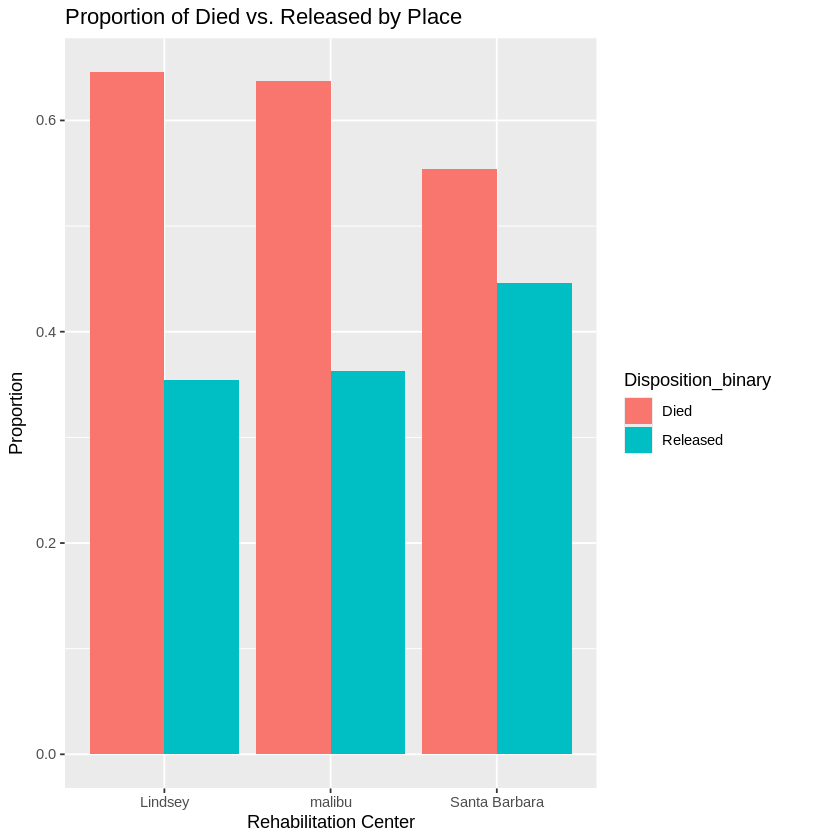

In [57]:
library(dplyr)
library(ggplot2)

# Calculate proportions for Place
proportions_place = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

# Plot the proportions for Place
p_place = ggplot(proportions_place, aes(x = Place, y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation Center") +
  ylab("Proportion") +
  labs(title = "Proportion of Died vs. Released by Place")

# Print the plot
print(p_place)

# Save the plot with the title
ggsave("/content/place_proportions_bar_chart.pdf", plot = p_place, width = 6, height = 4)

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

`summarise()` has grouped output by 'Species_group'. You can override using the
`.groups` argument.


# A tibble: 6 × 3
# Groups:   Species_group [3]
  Species_group   Disposition_binary count
  <chr>           <fct>              <int>
1 Non-selasphorus Died                2300
2 Non-selasphorus Released             853
3 Other           Died                 359
4 Other           Released             625
5 Selasphorus     Died                 555
6 Selasphorus     Released             308


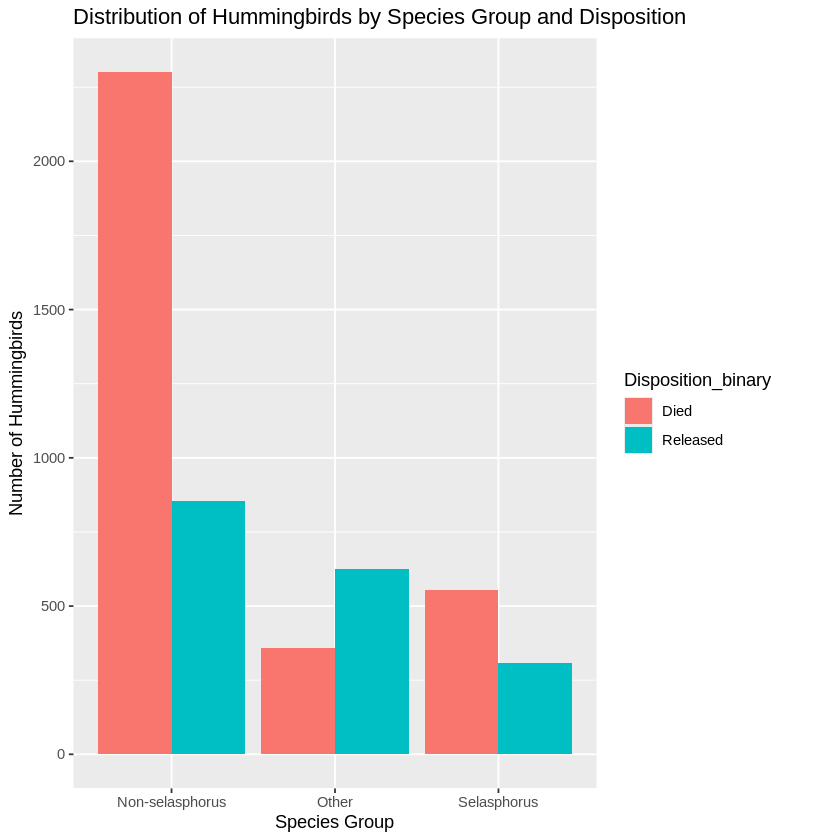

In [58]:
library(dplyr)
library(ggplot2)

## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(model_data$Species_e == "ANHU" | model_data$Species_e == "BCHU" | model_data$Species_e == "NonSselasphorus",
                                  "Non-selasphorus",
                                  ifelse(model_data$Species_e == "Selasphorus",
                                         "Selasphorus",
                                         "Other")) # Categorize remaining as 'Other' if any

# Tabulate and plot the distribution of the new species groups
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

# Print the table
print(species_distribution)

# Plot the distribution
ggplot(species_distribution, aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Number of Hummingbirds") +
  labs(title = "Distribution of Hummingbirds by Species Group and Disposition")

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [59]:
library(dplyr) # Include dplyr for subsequent steps that might use pipes

# Convert Admitted column to a date format
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y") #format used applies the date format i want to change the previous format to

Q12a Please explain the argument `format` in code above

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [60]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n())

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n())

Finally, we can use `ggplot` to plot these timelines.

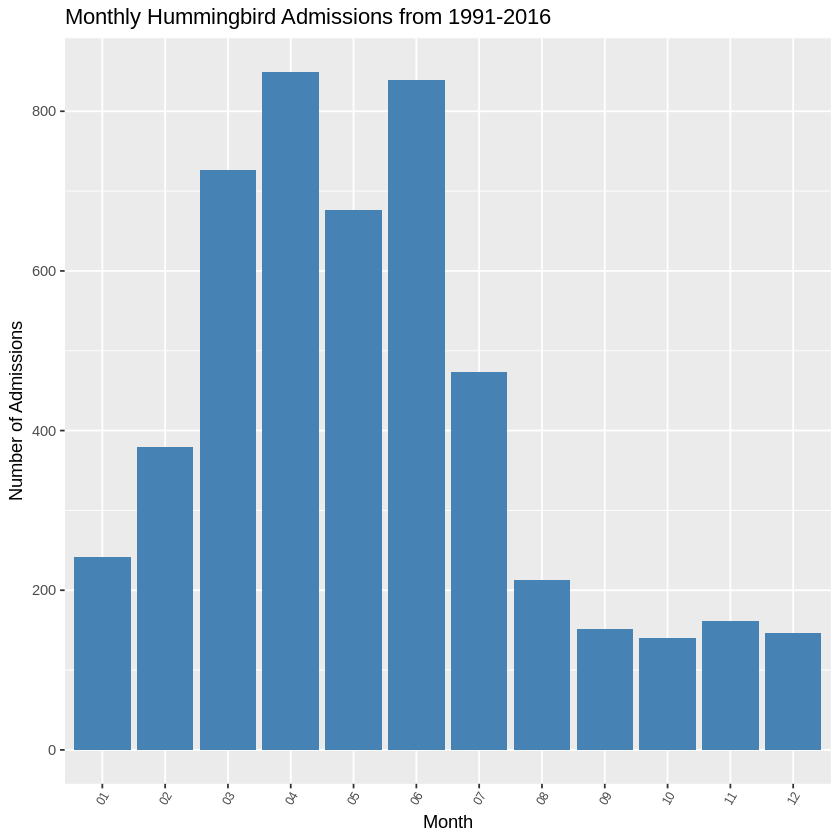

In [61]:
# Plot admissions by month
p_month = ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  xlab("Month") +
  ylab("Number of Admissions") +
  labs(title = "Monthly Hummingbird Admissions from 1991-2016") +
  theme(axis.text.x = element_text(angle = 60, hjust = 1, size = 7)) # Adjust angle and size for better readability

# Print the plot
print(p_month)

# Save the plot
ggsave("/content/monthly_admissions_bar_chart.pdf", plot = p_month, width = 10, height = 6)

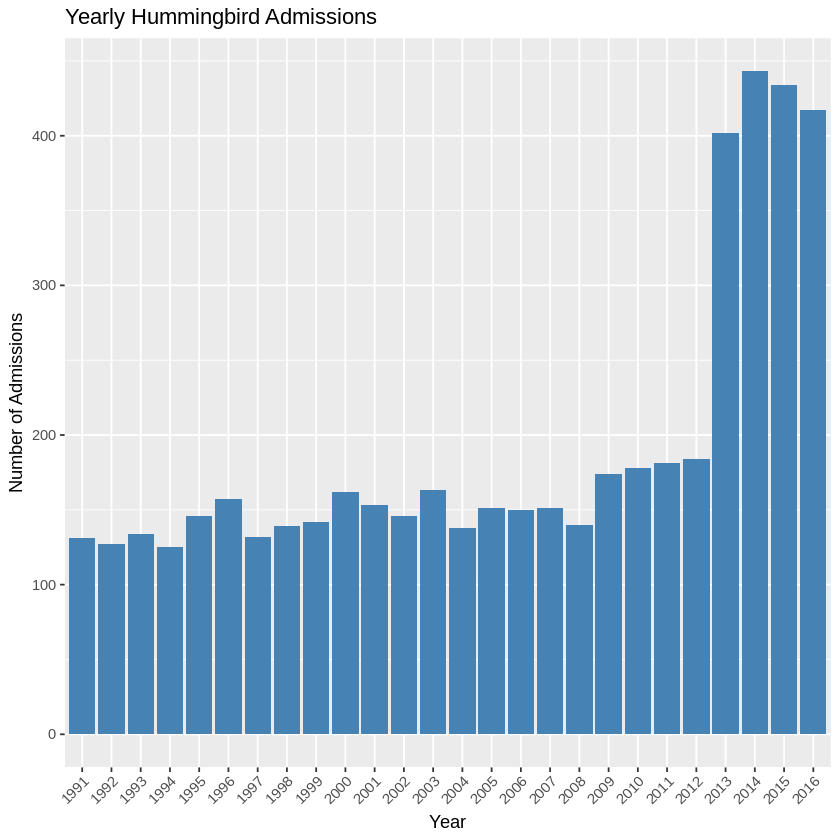

In [62]:
# Plot similar timeline for Yearly admissions of Hummingbirds
p_year = ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  xlab("Year") +
  ylab("Number of Admissions") +
  labs(title = "Yearly Hummingbird Admissions") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

# Print the plot
print(p_year)

# Save the plot
ggsave("/content/yearly_admissions_bar_chart.pdf", plot = p_year, width = 8, height = 6)

# Task
Calculate the number of hummingbird admissions for each month, broken down by `Species_group`, and then create a line plot to visualize this trend over time, using different colors for each `Species_group`.

In [64]:
library(dplyr)

admissions_by_month_species = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%m")) %>%
  group_by(Admitted_month, Species_group) %>%
  summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Admitted_month'. You can override using
the `.groups` argument.


**Reasoning**:
The user has provided the R code for calculating the number of hummingbird admissions for each month, broken down by Species_group. This code snippet aligns with the subtask instructions.



In [65]:
library(dplyr)

admissions_by_month_species = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%m")) %>%
  group_by(Admitted_month, Species_group) %>%
  summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Admitted_month'. You can override using
the `.groups` argument.


**Reasoning**:
The error `object 'model_data' not found` indicates that the `model_data` DataFrame and its `Admitted_date` column were not properly initialized or were not available in the environment when the code was executed. Additionally, the `cell_type` in the user's provided code block was incorrectly set to `python` instead of `r`. To fix this, I will include the necessary preceding steps to create `model_data` and its `Admitted_date` column, and correct the `cell_type` to `r`.



In [74]:
library(dplyr)

# Re-create model_data as it was not found
h_bird = read.csv('/content/Hummingbird_data.csv')
model_data = sample_n(h_bird, 5000)

# Re-create Admitted_date column as it was not found
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")

# Re-create Species_group column as it was missing
model_data$Species_group = ifelse(model_data$Species_e == "ANHU" | model_data$Species_e == "BCHU" | model_data$Species_e == "NonSselasphorus",
                                  "Non-selasphorus",
                                  ifelse(model_data$Species_e == "Selasphorus",
                                         "Selasphorus",
                                         "Other"))

admissions_by_month_species = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%m")) %>%
  group_by(Admitted_month, Species_group) %>%
  summarise(count = n_distinct(ID))

print(admissions_by_month_species)

`summarise()` has grouped output by 'Admitted_month'. You can override using
the `.groups` argument.


# A tibble: 35 × 3
# Groups:   Admitted_month [12]
   Admitted_month Species_group   count
   <chr>          <chr>           <int>
 1 01             Non-selasphorus   219
 2 01             Other               4
 3 01             Selasphorus        16
 4 02             Non-selasphorus   255
 5 02             Other              87
 6 02             Selasphorus        33
 7 03             Non-selasphorus   400
 8 03             Other             192
 9 03             Selasphorus       130
10 04             Non-selasphorus   529
# ℹ 25 more rows


## Plot Monthly Admissions by Species Group

### Subtask:
Create a line plot to visualize the trend of hummingbird admissions for each month, broken down by `Species_group`, using different colors for each `Species_group`.


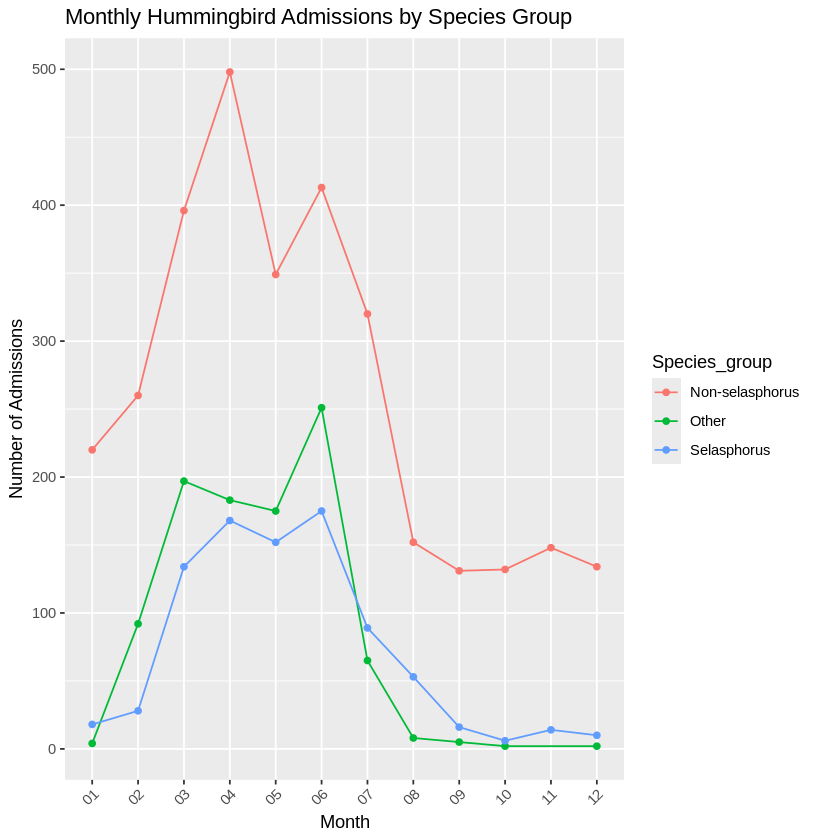

In [67]:
library(ggplot2)

p_line_plot = ggplot(admissions_by_month_species, aes(x = Admitted_month, y = count, color = Species_group, group = Species_group)) +
  geom_line() +
  geom_point() +
  xlab("Month") +
  ylab("Number of Admissions") +
  labs(title = "Monthly Hummingbird Admissions by Species Group") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(p_line_plot)

ggsave("/content/monthly_admissions_species_line_chart.pdf", plot = p_line_plot, width = 10, height = 6)

In [88]:
fullmodel  = glm(Disposition_binary ~ r + Green_Orange + season+F_Aid+Species_e, data = model_data, family= binomial(link = logit))
fullmodel


Call:  glm(formula = Disposition_binary ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = logit), data = model_data)

Coefficients:
                 (Intercept)                 rfound inside  
                    -1.99641                       0.20216  
        rfound on the ground                 rnest-related  
                     0.14908                       0.62388  
  rsuspect torpor-like state                      runknown  
                    -1.19744                       0.41853  
                 rwindow hit  Green_OrangeSelasphorus spp.  
                    -0.12828                       0.21195  
                seasonSpring                  seasonSummer  
                     1.12680                       1.00208  
                seasonWinter                      F_AidYes  
                     0.58358                      -0.08019  
               Species_eBCHU      Species_eNon-selasphorus  
                     0.27073                 

In [89]:
library(dplyr)
install.packages('sjPlot') # Re-install sjPlot to ensure it's available
library(sjPlot)


h_bird = read.csv('/content/Hummingbird_data.csv')
model_data = sample_n(h_bird, 5000)


model_data$Disposition_binary = as.factor(model_data$Disposition_binary)

model_data$r = as.factor(model_data$r)
model_data$season = as.factor(model_data$season)


str(model_data[, c('Disposition_binary', 'r', 'season')])



summary(fullmodel)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	5000 obs. of  3 variables:
 $ Disposition_binary: Factor w/ 2 levels "Died","Released": 2 1 2 2 2 1 2 1 1 1 ...
 $ r                 : Factor w/ 7 levels "caught by domestic animal",..: 3 5 1 3 3 7 1 3 7 3 ...
 $ season            : Factor w/ 4 levels "Fall","Spring",..: 2 4 3 2 3 2 3 4 2 3 ...



Call:
glm(formula = Disposition_binary ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = logit), data = model_data)

Coefficients: (1 not defined because of singularities)
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.99641    0.16549 -12.064  < 2e-16 ***
rfound inside                 0.20216    0.20558   0.983 0.325439    
rfound on the ground          0.14908    0.10394   1.434 0.151465    
rnest-related                 0.62388    0.13153   4.743 2.10e-06 ***
rsuspect torpor-like state   -1.19744    0.38325  -3.124 0.001781 ** 
runknown                      0.41853    0.12014   3.484 0.000495 ***
rwindow hit                  -0.12828    0.14474  -0.886 0.375480    
Green_OrangeSelasphorus spp.  0.21195    0.08618   2.460 0.013910 *  
seasonSpring                  1.12680    0.15176   7.425 1.13e-13 ***
seasonSummer                  1.00208    0.15527   6.454 1.09e-10 ***
seasonWinter                

In [90]:


backward_model = step(fullmodel,k=2,direction = "backward",test="Chisq")


forward_model = step(fullmodel,k=2,direction = ,test="Chisq")

Start:  AIC=5962.68
Disposition_binary ~ r + Green_Orange + season + F_Aid + Species_e


Step:  AIC=5965.23
Disposition_binary ~ r + season + F_Aid + Species_e

Start:  AIC=5962.68
Disposition_binary ~ r + Green_Orange + season + F_Aid + Species_e


Step:  AIC=5965.23
Disposition_binary ~ r + season + F_Aid + Species_e



In [91]:
names(backward_model)

library(sjPlot)

tab_model(backward_model)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          
[31] "anova"

In [84]:
summary(backward_model)


Call:
glm(formula = Disposition_binary ~ r + season, family = binomial(link = logit), 
    data = model_data)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -1.8868     0.1601 -11.788  < 2e-16 ***
rfound inside                0.1885     0.1944   0.969 0.332324    
rfound on the ground         0.1792     0.0999   1.793 0.072909 .  
rnest-related                1.2553     0.1190  10.550  < 2e-16 ***
rsuspect torpor-like state  -1.2648     0.3637  -3.478 0.000506 ***
runknown                     0.4483     0.1146   3.912 9.15e-05 ***
rwindow hit                 -0.2353     0.1424  -1.652 0.098557 .  
seasonSpring                 1.1740     0.1478   7.942 1.99e-15 ***
seasonSummer                 1.1207     0.1509   7.425 1.13e-13 ***
seasonWinter                 0.6092     0.1638   3.718 0.000201 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)



Q1: 31 model properties available

Q2: Which variable has the highest odds ratio for survival?

Non-selasphorus has highest survival odds

Q3: Do the calculated odds ratios match the values provided by sjPlot?
yes the values match